In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [113]:
df = pd.read_csv('NbaPlayersStats.csv')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [114]:
df.shape

(812, 30)

## Select variables to fit 

In [116]:
x = df. iloc[:,3:]
x.drop(columns='Tm', inplace = True)
x.columns


Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

## Standardization

In [117]:
scaler = StandardScaler()
x_std = scaler.fit_transform(x)
x_std[0:5]

array([[-0.99866529,  1.40229537,  0.47589852,  0.55328035,  0.32850492,
         0.41167855,  0.0859968 , -0.08474448, -0.20895277,  0.5236285 ,
         0.51093431,  0.71189224, -0.11135347, -0.01471502, -0.08103406,
         0.14188263, -0.22330967,  1.59630008,  1.10652825,  1.34746583,
        -0.38555868, -0.19463918,  0.68387512,  0.27073076,  0.64801465,
         0.20992925],
       [ 0.48020927,  1.51820564,  2.45047899,  0.83327292, -0.03141546,
        -0.27672195,  0.81359697, -1.03552192, -1.1616433 , -1.75600376,
         0.45416383,  0.36715808,  0.33204002,  0.37672652,  0.15202257,
         0.64663048, -0.40685019,  5.09226349,  1.60942057,  2.83592116,
         0.86651817,  0.74611686,  1.23862697,  0.63773139,  0.52699627,
        -0.14869905],
       [-0.5057071 ,  0.74547052,  1.65224433,  1.48658893,  1.99313669,
         1.42276679,  0.88096735, -1.03552192, -1.11627708, -1.75600376,
         3.00883538,  2.84297609,  0.40963388,  0.44089726,  2.63795999,
       

## Run PCA

In [118]:
pca_out = PCA().fit(x_std)

## Eigenvalues

In [119]:
pca_out.explained_variance_

array([1.35896716e+01, 3.16398071e+00, 2.26477147e+00, 1.14298258e+00,
       1.02620393e+00, 7.90665465e-01, 7.18787595e-01, 6.40063484e-01,
       5.21744184e-01, 4.07920562e-01, 3.37176908e-01, 3.22552367e-01,
       2.80304071e-01, 2.30617803e-01, 1.92235860e-01, 1.54466275e-01,
       1.21053356e-01, 6.77447764e-02, 2.68395441e-02, 1.31449512e-02,
       1.06745726e-02, 7.84327539e-03, 2.46917402e-04, 2.26570008e-04,
       8.29125006e-05, 5.74187385e-05])

## Kaiser rule: Choose Eigenvalues >1

Then we choose the first 5 PCA components

Text(0.5, 1.0, 'Scree Plot')

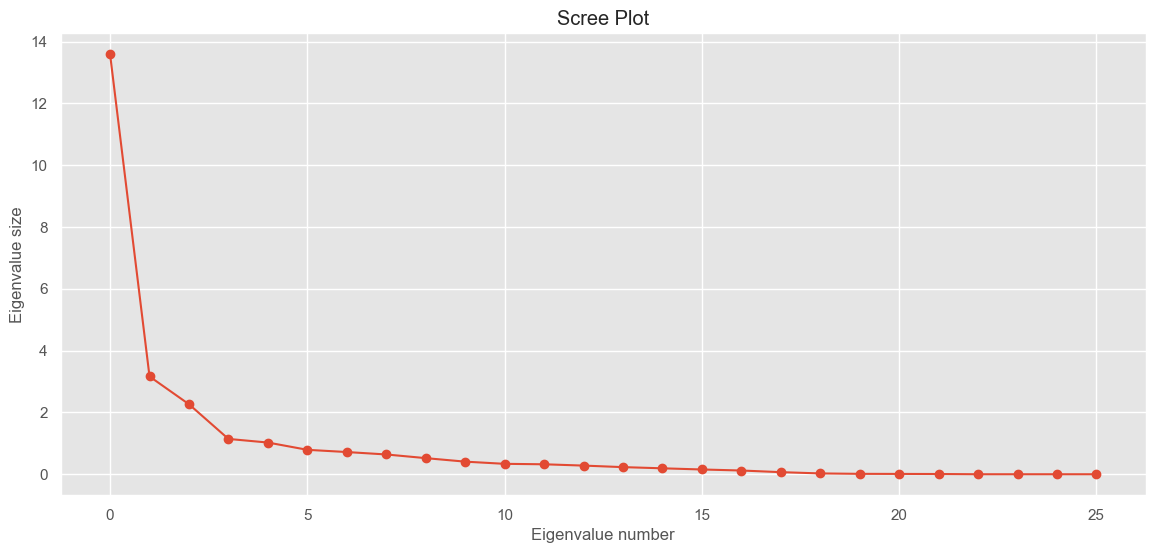

In [121]:
plt.style.use("ggplot")
plt.plot(pca_out.explained_variance_,marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

## Cumulative Variance 

In [122]:
pca_out.explained_variance_ratio_

array([5.22035984e-01, 1.21541699e-01, 8.69993207e-02, 4.39067294e-02,
       3.94207742e-02, 3.03727592e-02, 2.76116303e-02, 2.45875088e-02,
       2.00423708e-02, 1.56699307e-02, 1.29523718e-02, 1.23905821e-02,
       1.07676488e-02, 8.85899196e-03, 7.38458142e-03, 5.93369407e-03,
       4.65016445e-03, 2.60235949e-03, 1.03101887e-03, 5.04952416e-04,
       4.10054869e-04, 3.01292930e-04, 9.48512755e-06, 8.70349927e-06,
       3.18501506e-06, 2.20569330e-06])

In [123]:
np.cumsum(pca_out.explained_variance_ratio_)

array([0.52203598, 0.64357768, 0.730577  , 0.77448373, 0.81390451,
       0.84427727, 0.8718889 , 0.89647641, 0.91651878, 0.93218871,
       0.94514108, 0.95753166, 0.96829931, 0.9771583 , 0.98454288,
       0.99047658, 0.99512674, 0.9977291 , 0.99876012, 0.99926507,
       0.99967513, 0.99997642, 0.99998591, 0.99999461, 0.99999779,
       1.        ])

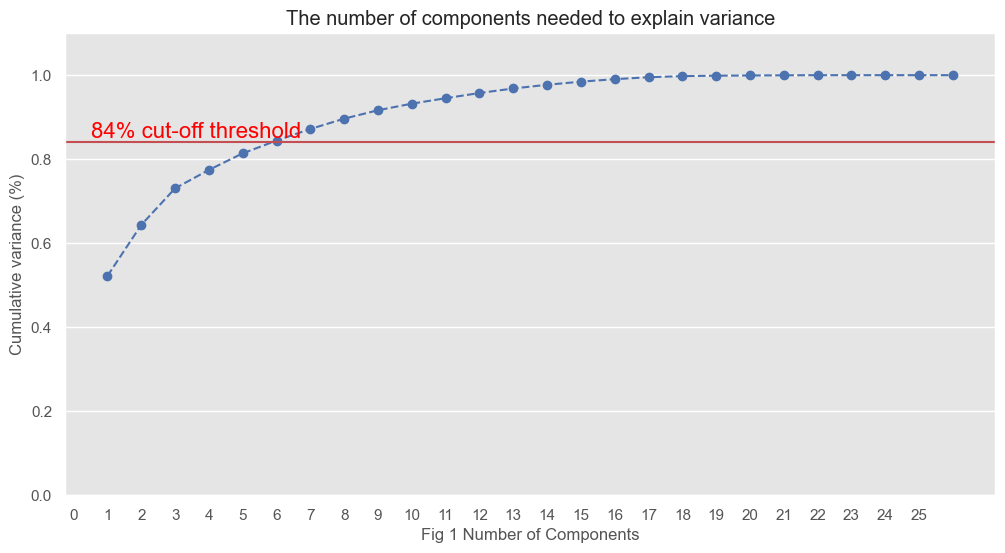

In [124]:
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
xi = np.arange(1, 27, step=1)
y = np.cumsum(pca_out.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Fig 1 Number of Components')
plt.xticks(np.arange(0, 26, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.84, color='r', linestyle='-')
plt.text(0.5, 0.85, '84% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

#84% of variance is observed by 7 components


## Perform PCA with 5 components

In [125]:
pca=PCA(n_components=5)
pca.fit(x_std)

PCA(n_components=5)

In [126]:
pca.explained_variance_

array([13.58967164,  3.16398071,  2.26477147,  1.14298258,  1.02620384])

In [127]:
pca.explained_variance_ratio_

array([0.52203598, 0.1215417 , 0.08699932, 0.04390673, 0.03942077])

In [128]:
x_pca=pca.transform(x_std)


In [129]:
x_std.shape

(812, 26)

In [130]:
x_pca.shape

(812, 5)

In [131]:
df_scaled = pd.DataFrame(x_std, columns=x.columns)
df_scaled.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,-0.998665,1.402295,0.475899,0.553280,0.328505,0.411679,0.085997,-0.084744,-0.208953,0.523628,...,-0.223310,1.596300,1.106528,1.347466,-0.385559,-0.194639,0.683875,0.270731,0.648015,0.209929
1,0.480209,1.518206,2.450479,0.833273,-0.031415,-0.276722,0.813597,-1.035522,-1.161643,-1.756004,...,-0.406850,5.092263,1.609421,2.835921,0.866518,0.746117,1.238627,0.637731,0.526996,-0.148699
2,-0.505707,0.745471,1.652244,1.486589,1.993137,1.422767,0.880967,-1.035522,-1.116277,-1.756004,...,0.334371,2.134141,2.838713,2.878448,0.866518,1.922062,1.238627,1.983400,1.858198,1.840058
3,-1.245144,-0.181812,-0.700447,-0.722241,-0.526306,-0.491847,-0.163274,-0.797828,-0.481150,-0.962260,...,-0.117421,0.251699,-0.458026,-0.268571,-0.603311,-0.900206,-0.148253,-0.585604,-0.562169,-0.605135
4,2.452042,0.397740,-0.196299,0.418469,1.138326,0.712854,0.833808,-0.678980,-0.707981,0.174381,...,0.757926,1.058460,0.771267,0.922193,-0.494435,-0.665017,1.793379,-0.096270,0.163941,0.829378


In [133]:
df_pc = pd.DataFrame(data = x_pca, columns = ['pc1','pc2','pc3','pc4','pc5'])
df_col = pd.concat([df_pc,df_scaled], axis=1)
df_col.head()

,pc1,pc2,pc3,pc4,pc5,Age,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.910348,1.321475,0.905917,-1.387308,-1.341190,-0.998665,1.402295,0.475899,0.553280,0.328505,...,-0.223310,1.596300,1.106528,1.347466,-0.385559,-0.194639,0.683875,0.270731,0.648015,0.209929
1,3.198430,4.178441,3.156111,-2.273944,0.361016,0.480209,1.518206,2.450479,0.833273,-0.031415,...,-0.406850,5.092263,1.609421,2.835921,0.866518,0.746117,1.238627,0.637731,0.526996,-0.148699
2,7.659599,2.616703,4.191996,1.159907,-0.311916,-0.505707,0.745471,1.652244,1.486589,1.993137,...,0.334371,2.134141,2.838713,2.878448,0.866518,1.922062,1.238627,1.983400,1.858198,1.840058
3,-2.240476,0.838551,0.556628,0.414044,-1.150679,-1.245144,-0.181812,-0.700447,-0.722241,-0.526306,...,-0.117421,0.251699,-0.458026,-0.268571,-0.603311,-0.900206,-0.148253,-0.585604,-0.562169,-0.605135
4,2.577885,2.219749,0.651600,-0.106070,1.851328,2.452042,0.397740,-0.196299,0.418469,1.138326,...,0.757926,1.058460,0.771267,0.922193,-0.494435,-0.665017,1.793379,-0.096270,0.163941,0.829378


## Loadings

In [134]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df


/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5
variable,,,,,
Age,0.032852,-0.014664,-0.069938,-0.140817,0.926071
G,0.174017,0.017998,-0.161554,-0.336495,-0.200709
GS,0.210972,-0.037906,0.043533,-0.170510,-0.119491
MP,0.252852,-0.075872,-0.052921,-0.131070,0.028643
FG,0.261443,-0.053287,0.016446,0.115379,-0.036472
FGA,0.253302,-0.154450,0.006027,0.082853,-0.035857
FG%,0.113919,0.404111,-0.297076,0.244131,0.028510
3P,0.176471,-0.296486,-0.269913,-0.105510,-0.035532
3PA,0.176837,-0.319875,-0.216910,-0.093621,-0.035158


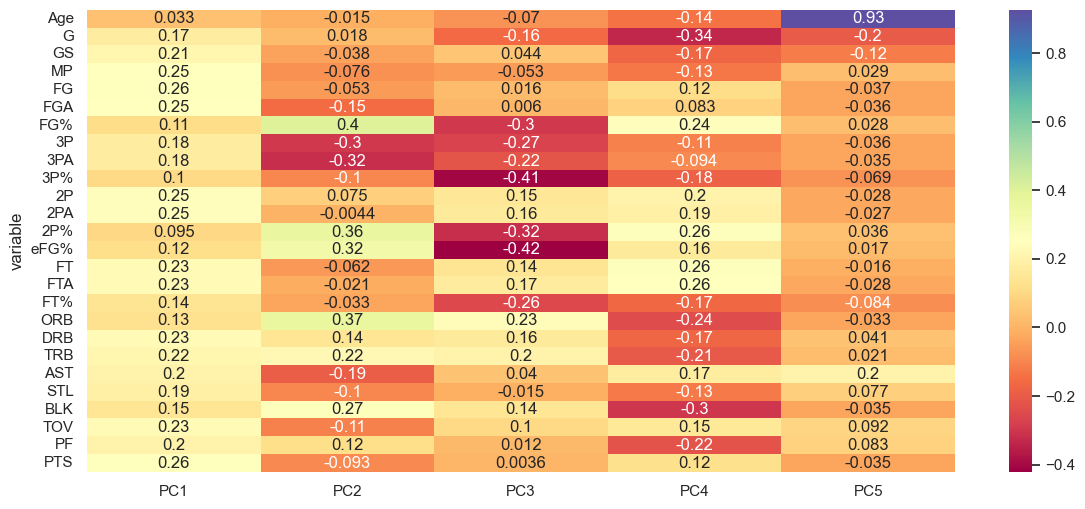

In [91]:
ax = sns.heatmap(loadings_df,annot=True, cmap='Spectral')
plt.show()

With the threshold of 0.25 you can make an analysis of the main characteristics of each PCA component

#  K means clustering from the PCA components

## Elbow Method

/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: Th

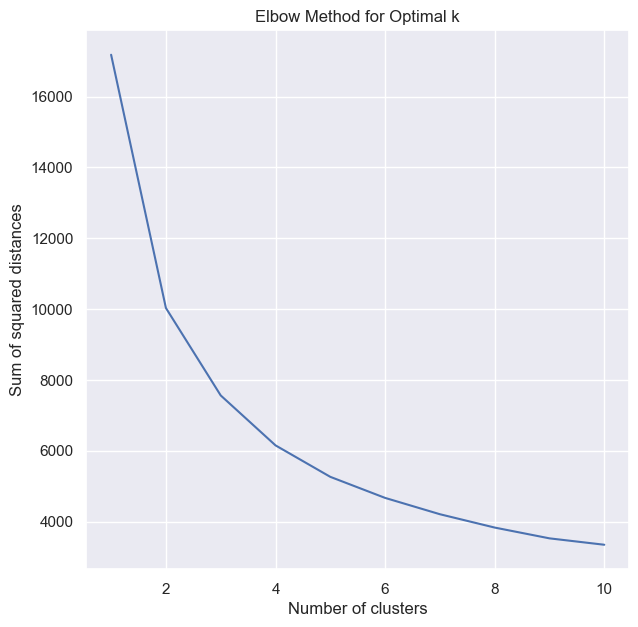

In [98]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(x_pca)
   wcss.append(model.inertia_)
plt.figure(figsize=(7,7))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')
plt.show()

Sometimes it is not clear which k value to choose, so we will do two more methods for that: Silhouette Score and 
Davies Bouldin Index 

## Silhouette Score

/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: Th

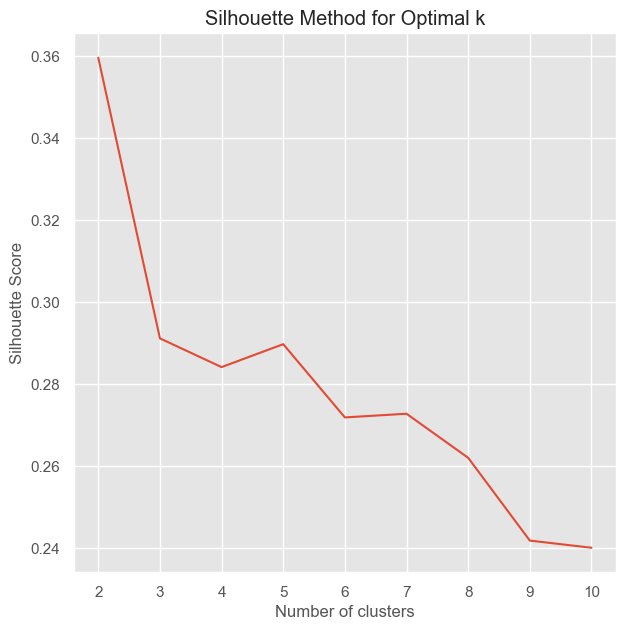

In [135]:
from sklearn.metrics import silhouette_score

sil = []
# Number of clusters in range 2-10
K = range(2, 11)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(x_pca)
    labels = algorithm.labels_
    sil.append(silhouette_score(x_pca, labels, metric = 'euclidean'))
    
plt.figure(figsize=(7,7))
plt.plot(range(2,11), sil)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

Here, we can easily visualize the peak point at k=5.

## Davies Bouldin index

/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: Th

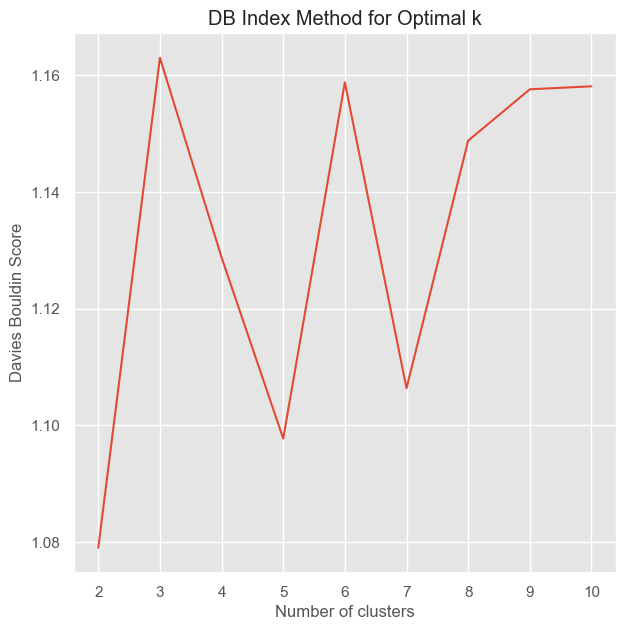

In [137]:
from sklearn.metrics import davies_bouldin_score

db = []
K = range(2, 11)
for n in K:
    algorithm = (KMeans(n_clusters = n) )
    algorithm.fit(x_pca)
    labels = algorithm.labels_
    db.append(davies_bouldin_score(x_pca,labels))
    
plt.figure(figsize=(7,7))
plt.plot(range(2,11), db)
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
plt.title('DB Index Method for Optimal k')
plt.show()

In this case the global minimum is k=5, the same value of the others two methods above, then we choose k=5 as the cluster number. 

# K means clustering with k=5

In [139]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x_pca)

/home/otitamario/data-science/myprojects/nba-players21-22/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [140]:
df_kmeans = pd.DataFrame(data = y_kmeans, columns = ['cluster'])
df_cluster = pd.concat([df_kmeans,df], axis=1)
df_cluster.head()

,cluster,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,4,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,4,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,2,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


In [110]:
df_cluster[df_cluster['cluster'] == 1]

,cluster,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
2,1,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
15,1,12,Giannis Antetokounmpo,PF,27,MIL,67,67,32.9,10.3,...,0.722,2.0,9.6,11.6,5.8,1.1,1.4,3.3,3.2,29.9
18,1,15,Cole Anthony,PG,21,ORL,65,65,31.7,5.5,...,0.854,0.5,4.9,5.4,5.7,0.7,0.3,2.6,2.6,16.3
19,1,16,OG Anunoby,SF,24,TOR,48,48,36.0,6.4,...,0.754,1.5,4.0,5.5,2.6,1.5,0.5,1.7,2.7,17.1
32,1,25,LaMelo Ball,PG,20,CHO,75,75,32.3,7.2,...,0.872,1.4,5.2,6.7,7.6,1.6,0.4,3.3,3.2,20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,1,576,Russell Westbrook,PG,33,LAL,78,78,34.3,7.0,...,0.667,1.4,6.0,7.4,7.1,1.0,0.3,3.8,3.0,18.5
777,1,578,Derrick White,SG,27,SAS,49,48,30.3,5.0,...,0.869,0.5,3.0,3.5,5.6,1.0,0.9,1.8,2.4,14.4
782,1,582,Andrew Wiggins,SF,26,GSW,73,73,31.9,6.5,...,0.634,1.2,3.3,4.5,2.2,1.0,0.7,1.5,2.2,17.2
797,1,595,Christian Wood,C,26,HOU,68,67,30.8,6.5,...,0.623,1.6,8.5,10.1,2.3,0.8,1.0,1.9,2.5,17.9


In [ ]:
filename = 'NbaPlayersStats.csv'
df.to_csv(filename,index = False)